# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Вероятность. 


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 35 баллов за контест и 5 баллов за ноутбук
* Задача 2 &mdash; 20 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 40 баллов

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

Условие задачи в контесте, ссылка на который отправлена через бот.

Продублируйте сюда написанный код и постройте требуемые графики.

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# from coin import coin, uniform_pdf, norm_pdf, expon_pdf

# Для запуска локально:
import scipy.stats as sps

coin = sps.bernoulli(p=0.5).rvs
uniform_pdf = sps.uniform.pdf
norm_pdf = sps.norm.pdf
expon_pdf = sps.expon.pdf

np.random.seed(521)

def uniform(size=1, precision=30):
    if isinstance(size, int):
        size = tuple([size])
    
    def bin2dec(ndarr):
        return ndarr.dot( (2 ** np.arange(precision))[::-1] )

    arr = bin2dec(coin(size + tuple([precision])))
    return arr / (2**precision)

def normal(size=1, loc=0, scale=1, precision=30):
    uni1 = uniform(size, precision)
    uni2 = uniform(size, precision)
    uni1 = np.cos(2 * np.pi * uni1)
    uni2 = np.sqrt(-2 * np.log(uni2))
    return loc + scale * uni1 * uni2

def expon(size=1, lambd=1, precision=30):
    great_leader_xi = uniform(size, precision)
    return - np.log(1 - great_leader_xi) / lambd

def plot_density(distr, size, lborder, rborder, label, kwargs):
    if distr == "uni":
        pdf = uniform_pdf
        rvs = uniform
    elif distr == "norm":
        pdf = norm_pdf
        rvs = normal
    elif distr == "exp":
        pdf = expon_pdf
        rvs = expon
    
    grid = np.linspace(lborder, rborder, 500)
    
    rvs_data = rvs(size, **kwargs)
    fig = plt.figure(figsize=(15, 12))

    # (fig, ax) = plt.subplots(figsize=(20,15))
    plt.title(f"Плотность {label} распределения", fontsize=25, y=1.01)
    plt.ylabel("Плотность", fontsize=25)
    plt.xlabel("Значение случ. величины", fontsize=25)
    plt.scatter(x=rvs_data, y=np.zeros((size)), alpha=0.4, c='red', s=5, linewidths=5.5, label="Значение случ. величины")

    plt.hist(x=rvs_data, bins=10, density=True, alpha=0.4, color="gold", label="Дискретная плотность")

    pdf_data = pdf(grid)
    
    # plt.xlim([lborder, rborder])
    plt.plot(grid, pdf_data, color='orange', linewidth=5, label="Непрерывная плотность")
    # plt.grid()
    
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    
    plt.legend(loc="upper right", fontsize=20)
    
    return plt.gcf()


def plot_uniform_density(size=200):
    return plot_density("uni", size, -0.25, 1.25, "Uni[0,1]",  {"precision": 50})


def plot_uniform_different_precision(size=100):
    # определите график размера 15 на 3
    fig = plt.figure(figsize=(15,3))
    
    plt.suptitle("Uniforms with diff. precisions comparison")
    plt.suptitle("Генерация равн. распр. в зависимости от точности")
    colors = ['b', 'g', 'r', 'c', 'm', 'y']
    labels = [1, 2, 3, 5, 10, 30]


    for i, precision in enumerate(labels):
        ax = plt.subplot(3, 2, i + 1)

        plt.scatter(
            uniform(size, precision),
            np.zeros(size),
            alpha=0.4,
            c = colors[i],
            label = labels[i]
        )

        plt.yticks([])
        if i < 4:
            plt.xticks([])
            
    fig.legend(loc="center", fontsize=12, title="Ps:")
            
    return plt.gcf()


def plot_normal_density(size=200):
    return plot_density("norm", size, -3, 3, "Normal(0,1)", {"precision": 50})


def plot_expon_density(size=100):
    return plot_density("exp", size, -0.5, 5, "Expon(1)", {"lambd": 1, "precision": 30})

Task 1.2:



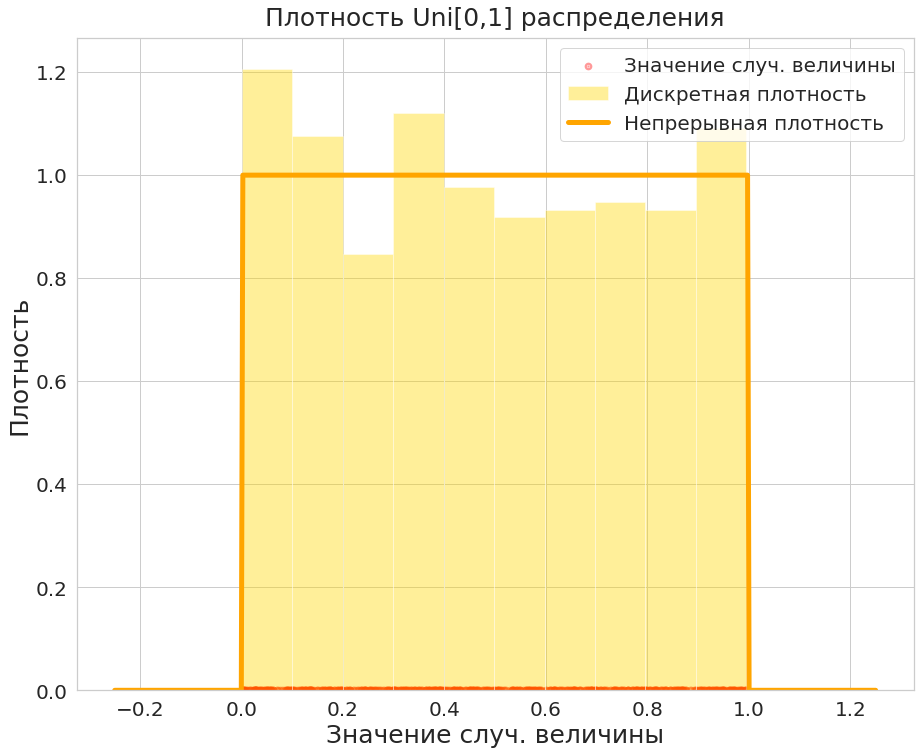

In [23]:
print("Task 1.2:\n")
_ = plot_uniform_density(700)

Task 1.3:



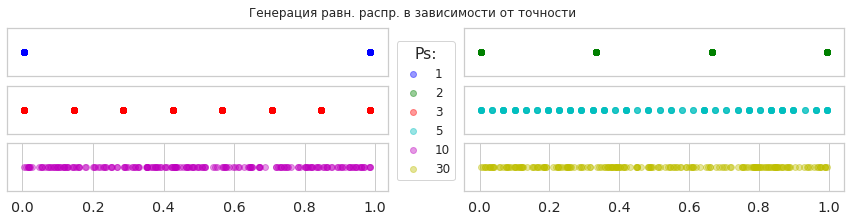

In [24]:
print("Task 1.3:\n")
_ = plot_uniform_different_precision(200) # xlabel не вместился

Task 2.2:



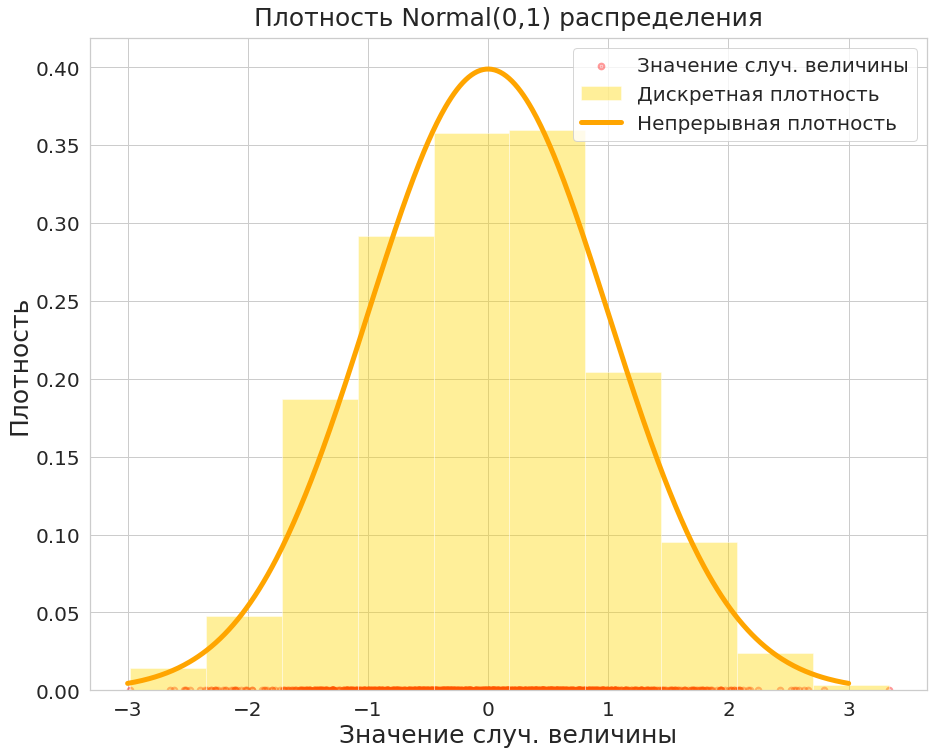

In [25]:
print("Task 2.2:\n")
_ = plot_normal_density(1000)

Task 3.2:



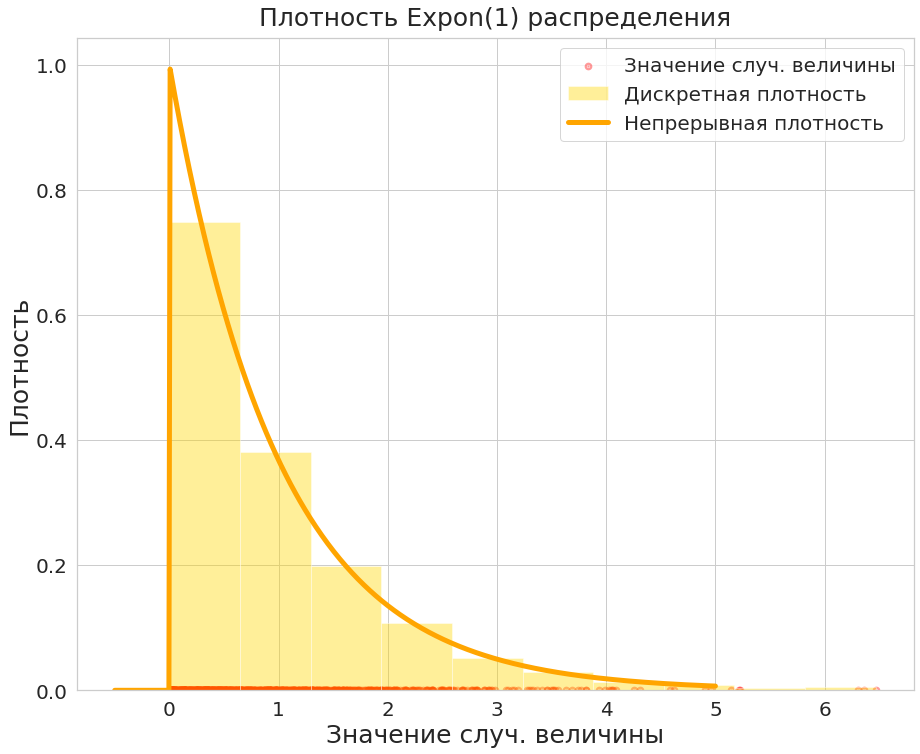

In [26]:
print("Task 3.2:\n")
_ = plot_expon_density(1000)

**Выводы:**

Было продемонстрировано, что хорошо известные распределения случайных величин (а именно, их плотности) можно приближать через одно единственное - бернуллиевское, достаточно лишь взять конечное число бросков монеты (экспериментов). На графиках показаны их плотности. С ростом числа бросков монеты (и точности построения равномерного распределения), апроксимации плотностей распределений будут все ближе к своим оригиналам:

In [8]:
size, loc, scale, precision = 150000, 0, 1, 70
rvs = normal(size, loc, scale, precision)
rvs_orig = sps.norm.rvs(size=size)

/home/h4zzkr/mipt/ida/ds/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ERROR! Session/line number was not unique in database. History logging moved to new session 32


/home/h4zzkr/mipt/ida/ds/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


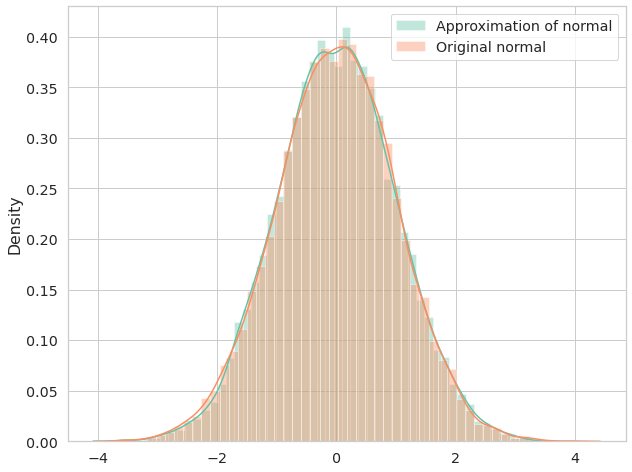

In [ ]:
import seaborn as sns

fig = plt.figure(figsize=(10, 8))
sns.distplot(rvs, label="Апроксимация плотности норм. распр.") # я забыл про подписи на русском, но времени осталось мало, я не успею прогнать этот большой тест
sns.distplot(rvs_orig, label="Плотность норм. распр.")    # не баньте плз
plt.legend()

---

### Задача 2.

Рассмотрим распределение Коши с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими тяжелыми хвостами. Иначе говоря, плотность убывает медленно при $x \to \infty$. Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

**1.** Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?

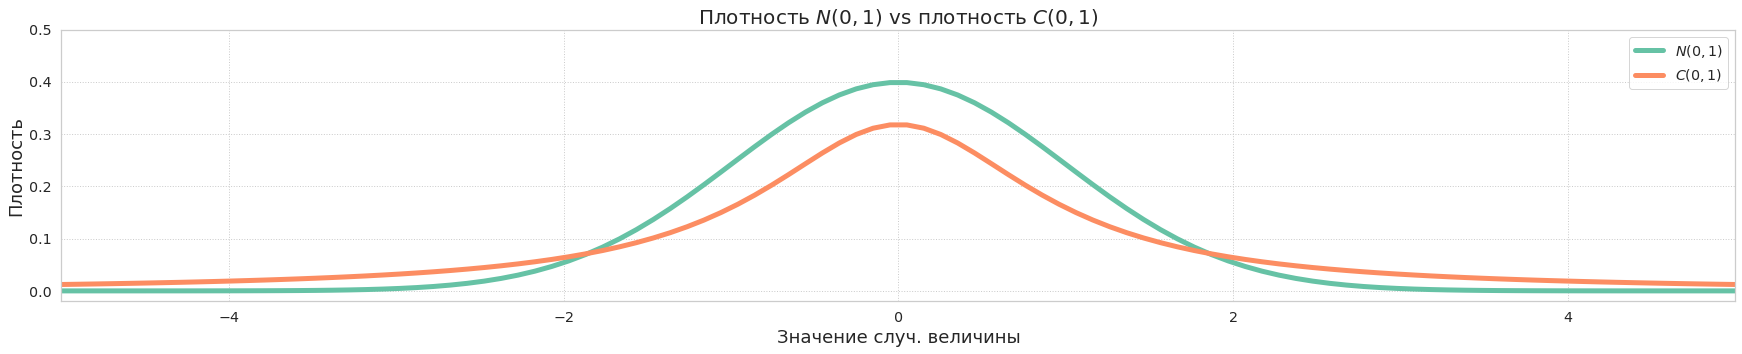

In [28]:
xmin, xmax, ymax = -5, 5, 0.5
grid_size = 100

kwargs = {'loc': 0, 'scale': 1}

fig = plt.figure(figsize=(30,5))
title = r'Плотность $N({loc}, {scale})$ vs плотность $C({loc}, {scale})$'

grid = np.linspace(xmin, xmax, grid_size)  
plt.plot(grid, sps.norm.pdf(grid, **kwargs), lw=5, label=r'$N({loc}, {scale})$'.format(**kwargs))
plt.plot(grid, sps.cauchy.pdf(grid, **kwargs), lw=5, label=r'$C({loc}, {scale})$'.format(**kwargs))

plt.grid(ls=':')
plt.xlabel('Значение случ. величины', fontsize=18)
plt.ylabel('Плотность', fontsize=18)
plt.xlim((xmin, xmax))
plt.ylim((None, ymax))
plt.title(title.format(**kwargs), fontsize=20)
plt.legend()
plt.show()

Графики плотностей похожи, но есть два различия:
- Пик у распределения Коши ниже, чем у нормального
- "Хвост" распределения Коши убывает медленнее, чем "хвост" нормального распределения

Далее распределение Коши с данными параметрами я буду называть просто распределением Коши.

**2.** Повторите эксперимент с <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/lec4_LLN.html">занятия</a> про закон больших чисел для распределения Коши. Выполняется ли закон? 

In [29]:
size = 12000  # количество случайных величин
samples_count = 2500  # количество выборок

samples = sps.cauchy.rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

Text(0.5, 1.0, 'Проверка ЗБЧ для распределения Коши')

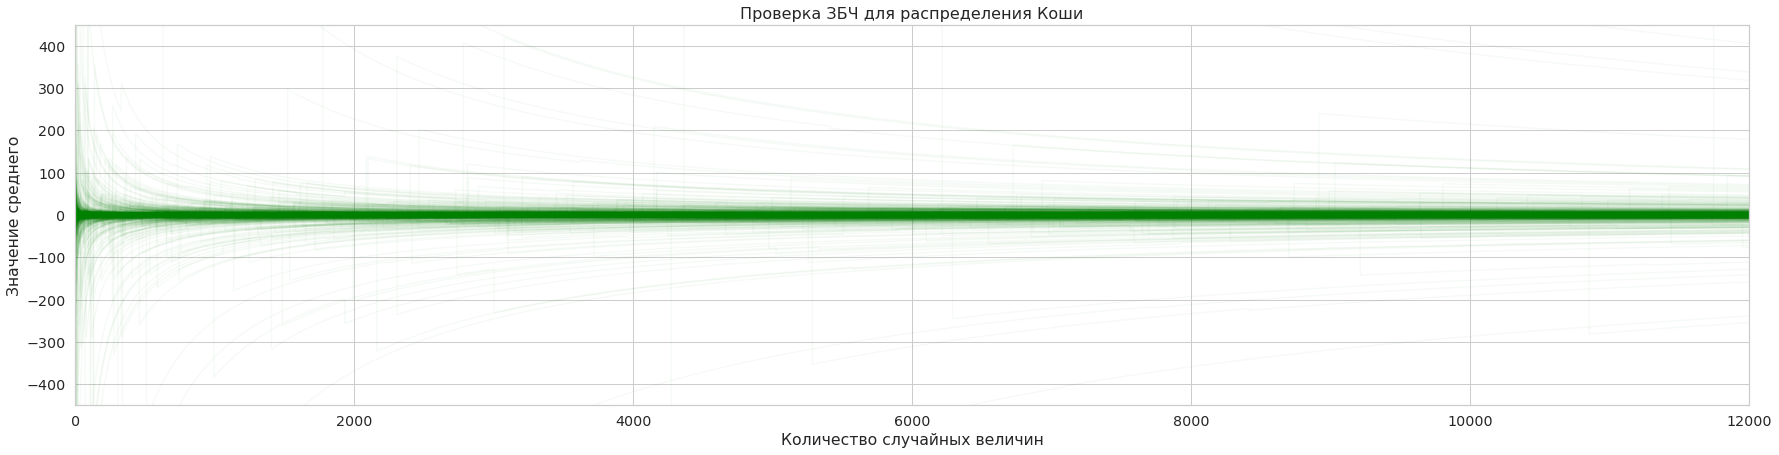

In [208]:
plt.figure(figsize=(30, 7))

for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_means[i], color='green', alpha=0.035)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));
plt.ylim(-450, 450)
plt.title("Проверка ЗБЧ для распределения Коши", fontsize=16)

Text(0.5, 1.0, 'Проверка ЗБЧ для распределения Коши')

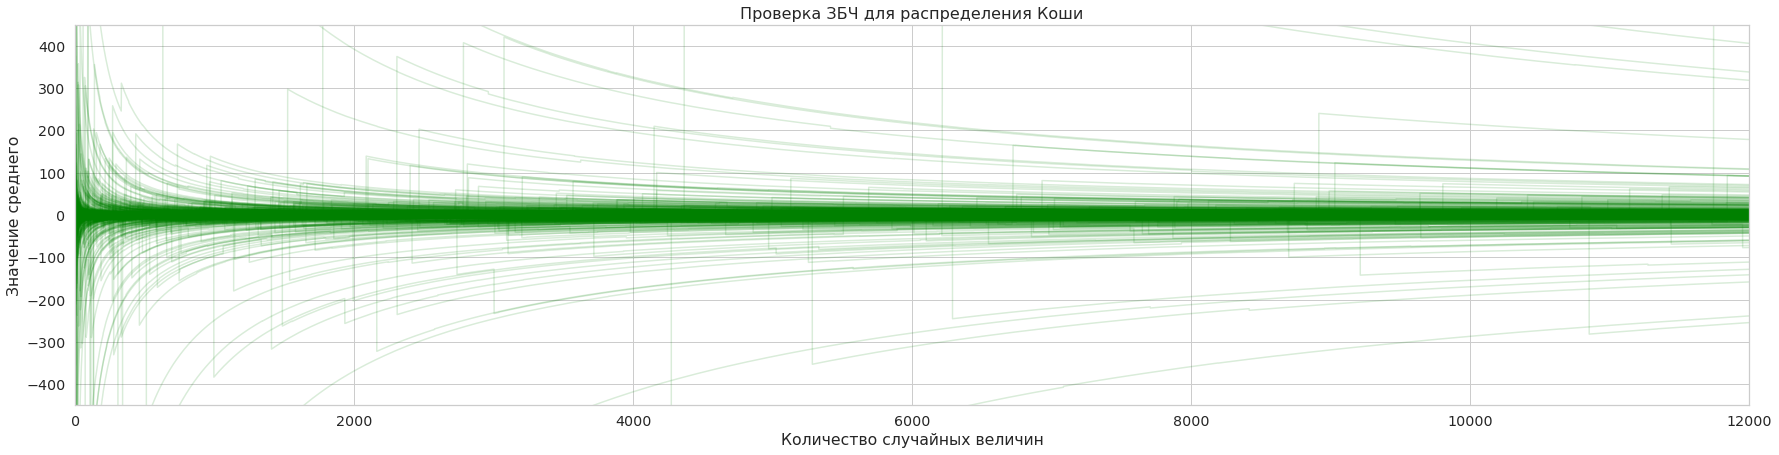

In [209]:
plt.figure(figsize=(30, 7))

for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_means[i], color='green', alpha=0.15)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));
plt.ylim(-450, 450)
plt.title("Проверка ЗБЧ для распределения Коши", fontsize=16)

Судя по графику, среднее подавляющего большинства выборок стремится к нулю. Если бы ЗБЧ выполнялся, то о сходимости не было бы речи, т.к. известно, что мат.ожидание для распределения Коши не определено.

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

In [17]:
size = 1500  # количество случайных величин
samples_count = 1000  # количество выборок

samples = sps.cauchy.rvs(size=(samples_count, size))

(-2.0, 2.0)

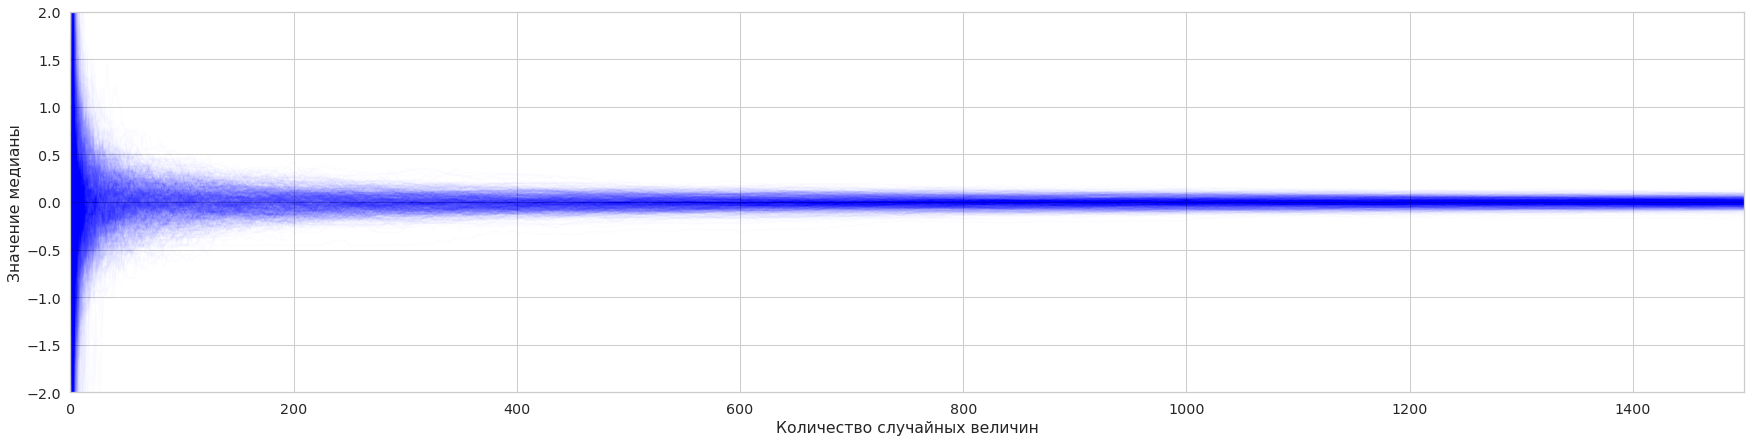

In [18]:
def cum_median(ar):
    out = []
    for i in range(1, len(ar) + 1):
        out.append(
            np.median(np.sort(ar[:i]))
        )
    return out

plt.figure(figsize=(30, 7))

for i in range(samples_count):
    cum_median_data = cum_median(samples[i])
    plt.plot(np.arange(size) + 1, cum_median_data, color="blue", alpha=0.012)
    
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение медианы')
plt.xlim((0, size));
plt.ylim(-2, 2)

Здесь четко видно, что выборочные медианы уменьшают амплитуду при $n \rightarrow \inf$, причем симметрично относительно оси Ох, т.е. их значения почти наверное стремятся к 0. При этом 0 - это сдвиг $x_0$ в распределении Коши, его медиана равна $x_0$, значит выборочные медианы стремятся к медиане распределения.

**Вывод:**

- Во-первых, оказывается, закон больших чисел работает не для всех распределений случайных величин. В случае Коши это было понятно, потому что нам изначально было известно, что у него не определено мат.ожидание - было бы странно по косвенным признакам понять, что ЗБЧ выполняется и выборочные средние куда-то там сходятся (почти наверное). 
- Очень похоже на то, что для распределения Коши выполняется правило 4 или 5 сигм (взял с запасом по аналогии с нормальным, все-таки хвосты Коши находятся выше хвостов нормального). В силу этой гипотезы говорит то, что плотность распределения Коши еще более "прижата" к x = 0, чем плотность нормального
- Также на уровне графика поняли, что мы можем с какого-то момента считать выборочную медиану Коши достаточно близкой к медиане Коши, по аналогии с ЗБЧ. Интересно было бы разобраться, есть ли аналоги неравенств Чебышева/каких-либо других, чтобы явно находить этот момент для произвольного $eps$.


### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/lec4_LLN.html">ноутбук</a> с лекции про закон больших чисел.

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - a \right|,$$
где $a$ &mdash; математическое ожидание элемента выборки, $S_{nj}$ &mdash; *выборочное* среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.

**1.** Рассмотрим распределения $Bern(a)$ для $a=0.5$. Пусть для нас допустимо отклонение на 0.02, иначе говоря при *истинном* среднем 0.5 мы считаем достаточно точными значения *выборочного* среднего от 0.48 до 0.52. Тогда в качестве *приближения* необходимого размера выборок можно взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуйте данный эксперимен для $K=500$  и найдите значение $n$. Визуализируйте зависимость $F(n)$ от $n$ в обычном и логарифмическом масштабах.

Для реализации без циклов стоит генерировать достаточно большие выборки и использовать функцию `np.where`.

In [8]:
K = 500
mean = 0.5
n_limit = 10000

samples = sps.bernoulli(mean).rvs(size=(K, n_limit))
sample_means = samples.cumsum(axis=1) / (np.arange(n_limit) + 1)
sample_means_dist = np.abs(sample_means - mean).sum(axis=0) / K

def get_nearest_n(sample_dist):
    return np.argmax(np.where(sample_dist <= 0.02, True, False))

nearest_n = np.argmax(np.where(sample_means_dist <= 0.02, True, False))
nearest_f_val = sample_means_dist[nearest_n]
print(f'Nearest n is {nearest_n}')

Nearest n is 386


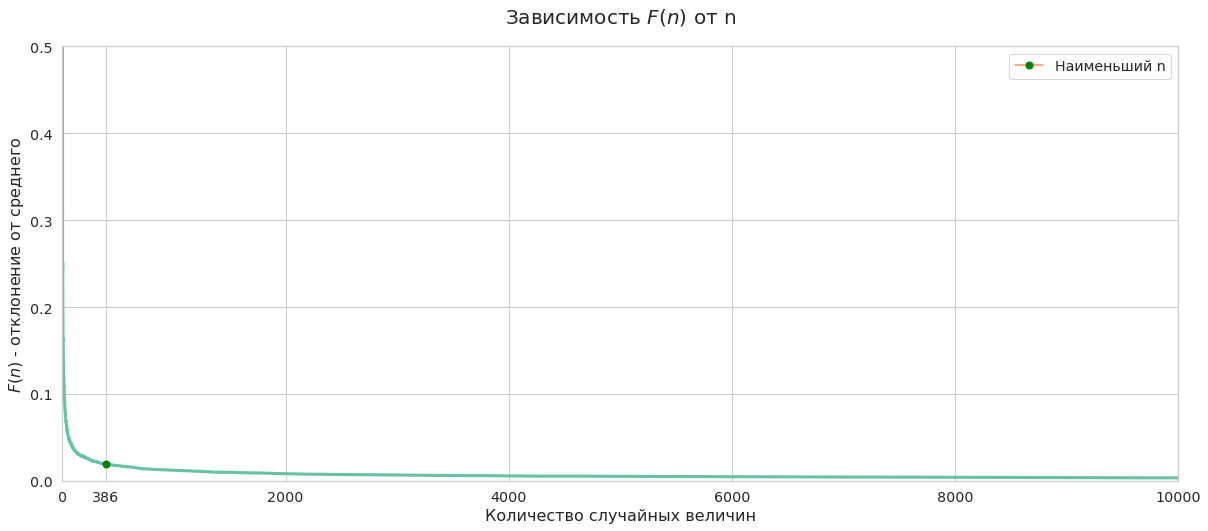

In [9]:
plt.figure(figsize=(20, 8))
plt.plot(sample_means_dist, lw=3.1)
# plt.hlines(0.5, 0, size, alpha=0.3)
plt.xlabel('Количество случайных величин', fontsize=16)
plt.ylabel(r'$F(n)$ - отклонение от среднего', fontsize=16)
plt.xlim((0, n_limit))
plt.ylim((0, mean))


plt.xticks(list(plt.xticks()[0]) + [nearest_n])
# plt.yticks(list(plt.yticks()[0]) + [nearest_f_val])
plt.plot(nearest_n, nearest_f_val, marker="o", markersize=7, markeredgecolor="green", markerfacecolor="g", label="Наименьший n")
plt.title(r"Зависимость $F(n)$ от n", y = 1.04, fontsize=20)

plt.legend()

Text(0.5, 1.04, 'Зависимость $F(n)$ от n, лог. масштаб')

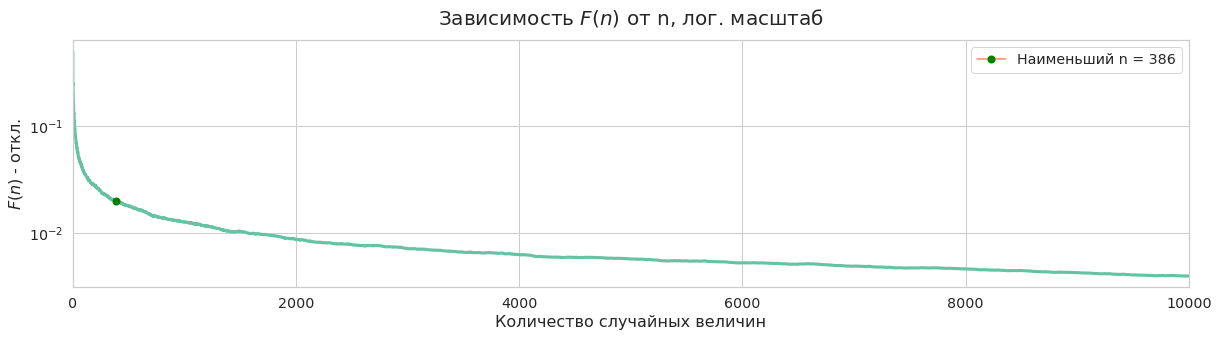

In [10]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2, 1, 1)

line = ax.plot(sample_means_dist, lw=3.1)
ax.set_yscale('log')

plt.xlabel('Количество случайных величин', fontsize=16)
plt.ylabel(r'$F(n)$ - откл.', fontsize=16)
plt.xlim((0, n_limit))

plt.plot(nearest_n, nearest_f_val, marker="o", markersize=7, markeredgecolor="green", markerfacecolor="g", label=f"Наименьший n = {nearest_n}")
plt.legend()
plt.title(r"Зависимость $F(n)$ от n, лог. масштаб", y = 1.04, fontsize=20)

Величина отклонения гиперболически зависит от размера выборок и невозсрастает с ростом n. Почему я так уверен в том, что это - гипербола? Тут два варианта - гиперболическая или экспоненциальная. Мы взяли логарифм от значения F(n), получили снова что-то похожее на гиперболу, а не на линейную функцию.


Это значит, что для оценки среднего для заданной наперед точности мы можем выбирать размер выборки, ориентируясь на график некоторой гиперболы. Для хорошего приближения можно взять n, близкий к n_limit.

**2.** Повторите данный эксперимент для значений $a$ от 0.05 до 0.95 с шагом 0.05. Визуализируйте зависимость необходимого размера выборки $n$ от значения $a$.

При реализации можно сделать цикл по значениям $a$. Пусть $n_0$ - минимальный такой размер выборки.

In [15]:
K = 500
n_limit = 10000
a_grid = np.arange(0.05, 0.95, 0.05)

def generate_sample():
    X, Y = [], []
    for a in a_grid:
        samples = sps.bernoulli(a).rvs(size=(K, n_limit))
        sample_means = samples.cumsum(axis=1) / (np.arange(n_limit) + 1)

        sample_means_dist = np.abs(sample_means - a).sum(axis=0) / K
        nearest_n = np.argmax(np.where(sample_means_dist <= 0.02, True, False))
        nearest_f_val = sample_means_dist[nearest_n]
        
        Y.append(nearest_n)
        X.append(a)
    return X, Y

Text(0.5, 1.04, 'Зависимость $n_0$ от a')

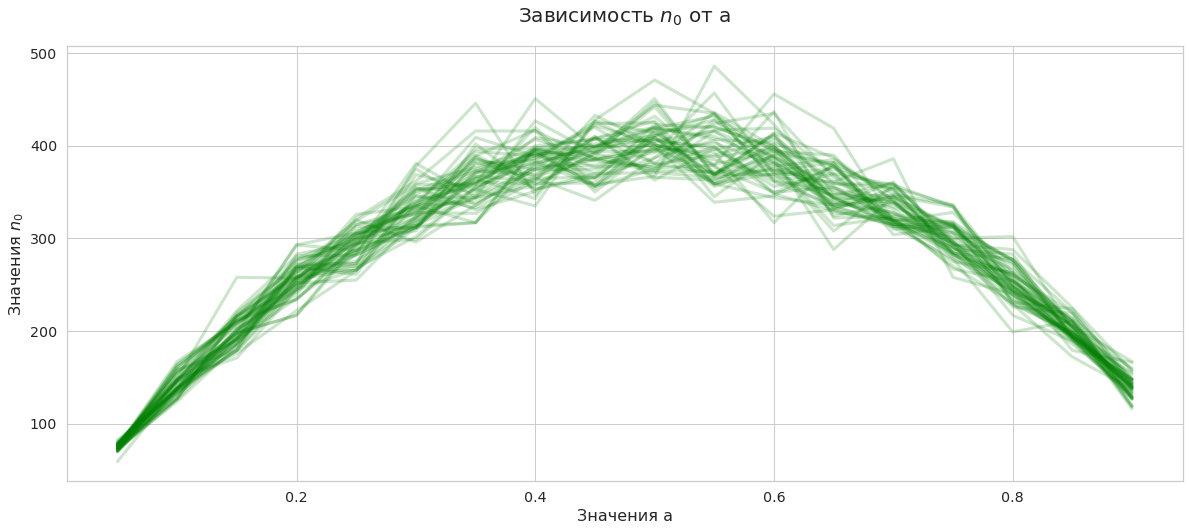

In [18]:
plt.figure(figsize=(20, 8))

for experiment_num in range(50):
    (X, Y) = generate_sample()
    plt.plot(X, Y, lw=3.1, alpha=0.2, c='g')
    
plt.xlabel('Значения a', fontsize=16)
plt.ylabel(r'Значения $n_0$', fontsize=16)
plt.title(r"Зависимость $n_0$ от a", y = 1.04, fontsize=20)

**Выводы:**

- Перед нами стояла задача - есть какая-то случайная величина, которая почему-то ведет себя как бернуллиевская и нам нужно определить, как много данных нужно собрать для оценки среднего с *хорошей* точностью.

    Для этого провели эксперимент - взяли K выборок и получили усредненное значение для отклонения в зависимости от n - размера выборок. Выяснили, что $n_0$, с которого начинается хорошее приближение среднего, относительно небольшой - для получения необходимой или лучшей точности можно брать $n_0$ в пределах [380; inf]. Это посильная величина для исследователя. Также мы поняли, что мера отклонения ведет себя гиперболически (подробнее написал выше).

    Плюсы такого оценивания в том, что нам сразу известен размер выборки, а вот в оценивании через Чебышева нам была бы известна только вероятность события.
- Еще мы поняли, что зависимость $n_0$ от $a$ - заданного математического ожидания, - квадратичная. Действительно, это парабола, ветви которой направлены вниз с наибольшим значением между a=0.4 и a=0.6. Это иллюстрирует то, что для "нечестных монеток" данных для требуемой апроксимации нужно в целом меньше, чем для "честной". Можно распространить эту мысль - для экспериментов и задач, в которых рассматриваемые события равновероятны, данные собирать сложнее (ну или как минимум дольше).